<a href="https://colab.research.google.com/github/JayTuli/WorldUniversityRankingPrediction/blob/main/WorldUniRankings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # use read data faster as in array
import pandas as pd #we can read csv and can cloumn can breought in data frames
import re # This module provides regular expression matching
# for visualization we import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import files


uploaded1 = files.upload()
uploaded2 = files.upload()

Saving qs-world-university-rankings-2017-to-2022-V2.csv to qs-world-university-rankings-2017-to-2022-V2 (1).csv


Saving 2023 QS World University Rankings.csv to 2023 QS World University Rankings.csv


In [ ]:
df_2020 = pd.read_csv('qs-world-university-rankings-2017-to-2022-V2.csv')
df_2020.head(4)

,university,year,rank_display,score,link,country,city,region,logo,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,1,100.0,https://www.topuniversities.com/universities/m...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,4.0,"3,730",M,"3,065"
1,Stanford University,2017,2,98.7,https://www.topuniversities.com/universities/s...,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,3.0,"3,879",L,"4,725"
2,Harvard University,2017,3,98.3,https://www.topuniversities.com/universities/h...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,5.0,"5,877",L,"4,646"
3,University of Cambridge,2017,4,97.2,https://www.topuniversities.com/universities/u...,United Kingdom,Cambridge,Europe,https://www.topuniversities.com/sites/default/...,Public,Very high,4.0,"7,925",L,"5,800"


In [ ]:
df_2023 = pd.read_csv('2023 QS World University Rankings.csv')
df_2023.head(4)

,Rank,institution,location code,location,ar score,ar rank,er score,er rank,fsr score,fsr rank,...,cpf rank,ifr score,ifr rank,isr score,isr rank,irn score,irn rank,ger score,ger rank,score scaled
0,1,Massachusetts Institute of Technology (MIT),US,United States,100.0,5,100.0,4,100.0,14,...,5,100.0,54,90.0,109,96.1,58,100.0,3,100
1,2,University of Cambridge,UK,United Kingdom,100.0,2,100.0,2,100.0,11,...,55,100.0,60,96.3,70,99.5,6,100.0,9,98.8
2,3,Stanford University,US,United States,100.0,4,100.0,5,100.0,6,...,9,99.8,74,60.3,235,96.3,55,100.0,2,98.5
3,4,University of Oxford,UK,United Kingdom,100.0,3,100.0,3,100.0,8,...,64,98.8,101,98.4,54,99.9,3,100.0,7,98.4


In [ ]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6482 entries, 0 to 6481
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   university              6482 non-null   object 
 1   year                    6482 non-null   int64  
 2   rank_display            6414 non-null   object 
 3   score                   2820 non-null   float64
 4   link                    6482 non-null   object 
 5   country                 6482 non-null   object 
 6   city                    6304 non-null   object 
 7   region                  6482 non-null   object 
 8   logo                    6482 non-null   object 
 9   type                    6470 non-null   object 
 10  research_output         6480 non-null   object 
 11  student_faculty_ratio   6407 non-null   float64
 12  international_students  6318 non-null   object 
 13  size                    6480 non-null   object 
 14  faculty_count           6404 non-null   

In [ ]:
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           1422 non-null   int64  
 1   institution    1422 non-null   object 
 2   location code  1422 non-null   object 
 3   location       1422 non-null   object 
 4   ar score       1422 non-null   float64
 5   ar rank        1422 non-null   object 
 6   er score       1421 non-null   float64
 7   er rank        1422 non-null   object 
 8   fsr score      1420 non-null   float64
 9   fsr rank       1422 non-null   object 
 10  cpf score      1417 non-null   float64
 11  cpf rank       1422 non-null   object 
 12  ifr score      1324 non-null   float64
 13  ifr rank       1324 non-null   object 
 14  isr score      1365 non-null   float64
 15  isr rank       1365 non-null   object 
 16  irn score      1409 non-null   float64
 17  irn rank       1409 non-null   object 
 18  ger scor

In [ ]:
# Investigate columns from both data
columns1 = df_2020.columns # columns from data 2017-2022
columns2 = df_2023.columns # columns from data 2023

print("columns from data 2017-2022:", columns1)
print("columns from data 2023 :", columns2)

columns from data 2017-2022: Index(['university', 'year', 'rank_display', 'score', 'link', 'country',
       'city', 'region', 'logo', 'type', 'research_output',
       'student_faculty_ratio', 'international_students', 'size',
       'faculty_count'],
      dtype='object')
columns from data 2023 : Index(['Rank', 'institution', 'location code', 'location', 'ar score',
       'ar rank', 'er score', 'er rank', 'fsr score', 'fsr rank', 'cpf score',
       'cpf rank', 'ifr score', 'ifr rank', 'isr score', 'isr rank',
       'irn score', 'irn rank', 'ger score', 'ger rank', 'score scaled'],
      dtype='object')


Observation:

Data has different column names but actually multiple columns contain the same information.
Common column pair:

'university'='institution'
'rank_display'='Rank'
'score'='score scaled'
'country'='location'
Next:

Create new dataframe by combining both data with the common columns, year, and selected additional data.
Prepare both data to be combined

In [ ]:
# copy selected columns from Data 2017-2020
df_temp2020 = df_2020[['university','rank_display','score','country', 'year']].copy()

In [ ]:
# Check missing values in Data 2017-2020
pd.DataFrame(df_temp2020.isnull().sum(), columns=['Number of Missing values'])

,Number of Missing values
university,0
rank_display,68
score,3662
country,0
year,0


In [ ]:
# Drop any row with missing values
df_temp2020 = df_temp2020.dropna()
# Check result
df_temp2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2808 entries, 0 to 5682
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   university    2808 non-null   object 
 1   rank_display  2808 non-null   object 
 2   score         2808 non-null   float64
 3   country       2808 non-null   object 
 4   year          2808 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 131.6+ KB


In [ ]:
# function to check if value can not be converted to int
def isnot_int(val):
    try:
        int_val = int(val)
        return False
    except:
        return True

# example
print(isnot_int('90-0'))
print(isnot_int('900'))

True
False


In [ ]:
# Check if all value in rank_display column can be converted to int64
not_converted_values = df_temp2020[df_temp2020['rank_display'].map(isnot_int)]
print(len(not_converted_values),"values cannot be converted to int.")
# Check result
not_converted_values

5 values cannot be converted to int.


,university,rank_display,score,country,year
404,Khalifa University of Science and Technology,401-410,36.5,United Arab Emirates,2017
481,Pontificia Universidad Católica del Perú,481-490,26.4,Peru,2017
1371,Pontificia Universidad Católica del Perú,431-440,26.4,Peru,2018
1386,Khalifa University of Science and Technology,451-460,36.5,United Arab Emirates,2018
2465,Pontificia Universidad Católica del Perú,551-560,26.4,Peru,2019


In [ ]:
# Remove entries without exact ranking from data.
df_temp2020 = df_temp2020.drop(not_converted_values.index)

In [ ]:
# Check result
not_converted_values2 = df_temp2020[df_temp2020['rank_display'].map(isnot_int)]
print(len(not_converted_values2),"values cannot be converted to int.")
# Check result
df_temp2020.info()

0 values cannot be converted to int.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2803 entries, 0 to 5682
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   university    2803 non-null   object 
 1   rank_display  2803 non-null   object 
 2   score         2803 non-null   float64
 3   country       2803 non-null   object 
 4   year          2803 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 131.4+ KB


In [ ]:
# convert rank_display into int64
df_temp2020['rank_display'] = df_temp2020['rank_display'].astype(int)
# Check result
df_temp2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2803 entries, 0 to 5682
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   university    2803 non-null   object 
 1   rank_display  2803 non-null   int64  
 2   score         2803 non-null   float64
 3   country       2803 non-null   object 
 4   year          2803 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 131.4+ KB


now process data

In [ ]:
# copy selected columns from Data 2023
df_temp2023 = df_2023[['institution','Rank','score scaled','location']].copy()
# add year column
df_temp2023['year'] = 2023
# Check result
df_temp2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   institution   1422 non-null   object
 1   Rank          1422 non-null   int64 
 2   score scaled  1422 non-null   object
 3   location      1422 non-null   object
 4   year          1422 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 55.7+ KB


In [ ]:
# rename columns
df_temp2023.columns = ['university','rank_display','score','country', 'year']
# Check result
df_temp2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   university    1422 non-null   object
 1   rank_display  1422 non-null   int64 
 2   score         1422 non-null   object
 3   country       1422 non-null   object
 4   year          1422 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 55.7+ KB


In [ ]:
# function to check if value can not be converted to float
def isnot_float(val):
    try:
        int_val = float(val)
        return False
    except:
        return True

# example
print(isnot_float('9.0-0'))
print(isnot_float('90.0'))

True
False


In [ ]:
# Check if all value in score column can be converted to float
not_converted_values3 = df_temp2023[df_temp2023['score'].map(isnot_float)]
print(len(not_converted_values3),"values cannot be converted to float.")
# Check result
not_converted_values3

922 values cannot be converted to float.


,university,rank_display,score,country,year
500,Western Sydney University,501,-,Australia,2023
501,Bar-Ilan University,502,-,Israel,2023
502,Colorado School of Mines,503,-,United States,2023
503,Kyungpook National University,504,-,South Korea,2023
504,Middle East Technical University,505,-,Turkey,2023
...,...,...,...,...,...
1417,Universidad Nacional Autónoma de Honduras (UNAH),1418,-,Honduras,2023
1418,Universidad Tecnológica de Bolívar,1419,-,Colombia,2023
1419,Université Mohammed V de Rabat,1420,-,Morocco,2023
1420,University of Craiova,1421,-,Romania,2023


In [ ]:
# convert score into float64
df_temp2023['score'] = df_temp2023['score'].apply(pd.to_numeric, errors='coerce')
# Check result
df_temp2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   university    1422 non-null   object 
 1   rank_display  1422 non-null   int64  
 2   score         500 non-null    float64
 3   country       1422 non-null   object 
 4   year          1422 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 55.7+ KB


In [ ]:
# remove entries with missing values
df_temp2023 = df_temp2023.dropna()
# Check result
df_temp2023.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   university    500 non-null    object 
 1   rank_display  500 non-null    int64  
 2   score         500 non-null    float64
 3   country       500 non-null    object 
 4   year          500 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 23.4+ KB


In [ ]:
df_temp2023.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   university    500 non-null    object 
 1   rank_display  500 non-null    int64  
 2   score         500 non-null    float64
 3   country       500 non-null    object 
 4   year          500 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 23.4+ KB


In [ ]:
df_temp2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2803 entries, 0 to 5682
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   university    2803 non-null   object 
 1   rank_display  2803 non-null   int64  
 2   score         2803 non-null   float64
 3   country       2803 non-null   object 
 4   year          2803 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 131.4+ KB


now mereging the both


In [ ]:
df_join = pd.concat([df_temp2020, df_temp2023])
# Check result
df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3303 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   university    3303 non-null   object 
 1   rank_display  3303 non-null   int64  
 2   score         3303 non-null   float64
 3   country       3303 non-null   object 
 4   year          3303 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 154.8+ KB


In [ ]:
# Check the 5 last entries
df_join.tail()

,university,rank_display,score,country,year
495,University of Granada,496,24.4,Spain,2023
496,Brandeis University,497,24.3,United States,2023
497,Jilin University,498,24.3,China (Mainland),2023
498,Central South University,499,24.2,China (Mainland),2023
499,"University of Rome ""Tor Vergata""",500,24.2,Italy,2023


Observation:

There are 3303 entries but the last entry index is 499, it should be 3302.

In [ ]:
# Fix Indexing
df_join = df_join.reset_index(drop=True)
# Check result
df_join.tail()

,university,rank_display,score,country,year
3298,University of Granada,496,24.4,Spain,2023
3299,Brandeis University,497,24.3,United States,2023
3300,Jilin University,498,24.3,China (Mainland),2023
3301,Central South University,499,24.2,China (Mainland),2023
3302,"University of Rome ""Tor Vergata""",500,24.2,Italy,2023


In [ ]:
df_join.rename(columns = {'rank_display':'rank'}, inplace = True)
# Check result
df_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3303 entries, 0 to 3302
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   university  3303 non-null   object 
 1   rank        3303 non-null   int64  
 2   score       3303 non-null   float64
 3   country     3303 non-null   object 
 4   year        3303 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 129.1+ KB


In [ ]:
# Create country region dictionary
country_region = dict(zip(df_2020['country'], df_2020['region']))

In [ ]:
# Add region information
df_join['region'] = df_join['country'].map(lambda x: country_region[x])
# Check result
df_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3303 entries, 0 to 3302
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   university  3303 non-null   object 
 1   rank        3303 non-null   int64  
 2   score       3303 non-null   float64
 3   country     3303 non-null   object 
 4   year        3303 non-null   int64  
 5   region      3303 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 155.0+ KB


In [ ]:
# Change Latin America to South America
df_join['region'] = df_join['region'].apply(lambda x: x.replace('Latin America', 'South America'))

In [ ]:
# Create university type dictionary
university_type = dict(zip(df_2020['university'], df_2020['type']))

In [ ]:
# Add university type information
df_join['type'] = df_join['university'].map(lambda x: university_type[x] if x in university_type else 'No data' )
# Check result
df_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3303 entries, 0 to 3302
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   university  3303 non-null   object 
 1   rank        3303 non-null   int64  
 2   score       3303 non-null   float64
 3   country     3303 non-null   object 
 4   year        3303 non-null   int64  
 5   region      3303 non-null   object 
 6   type        3303 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 180.8+ KB


In [ ]:
# Check result
df_join.head()

,university,rank,score,country,year,region,type
0,Massachusetts Institute of Technology (MIT),1,100.0,United States,2017,North America,Private
1,Stanford University,2,98.7,United States,2017,North America,Private
2,Harvard University,3,98.3,United States,2017,North America,Private
3,University of Cambridge,4,97.2,United Kingdom,2017,Europe,Public
4,California Institute of Technology (Caltech),5,96.9,United States,2017,North America,Private


In [ ]:
# dataframe number of university from each region over the year
region_year_df = df_join[['region','year']].value_counts().reset_index()
region_year_df.columns = ['region','year','sum']
# Check result
region_year_df.head()

,region,year,sum
0,Europe,2020,214
1,Europe,2021,213
2,Europe,2022,212
3,Europe,2019,210
4,Europe,2023,207


In [ ]:
# Display stacked barplot of the Number of University from Each Region over the Year
fig = px.bar(region_year_df, x="year", y="sum", color="region",
             title="Number of University from Each Region over the Year")
fig.show()

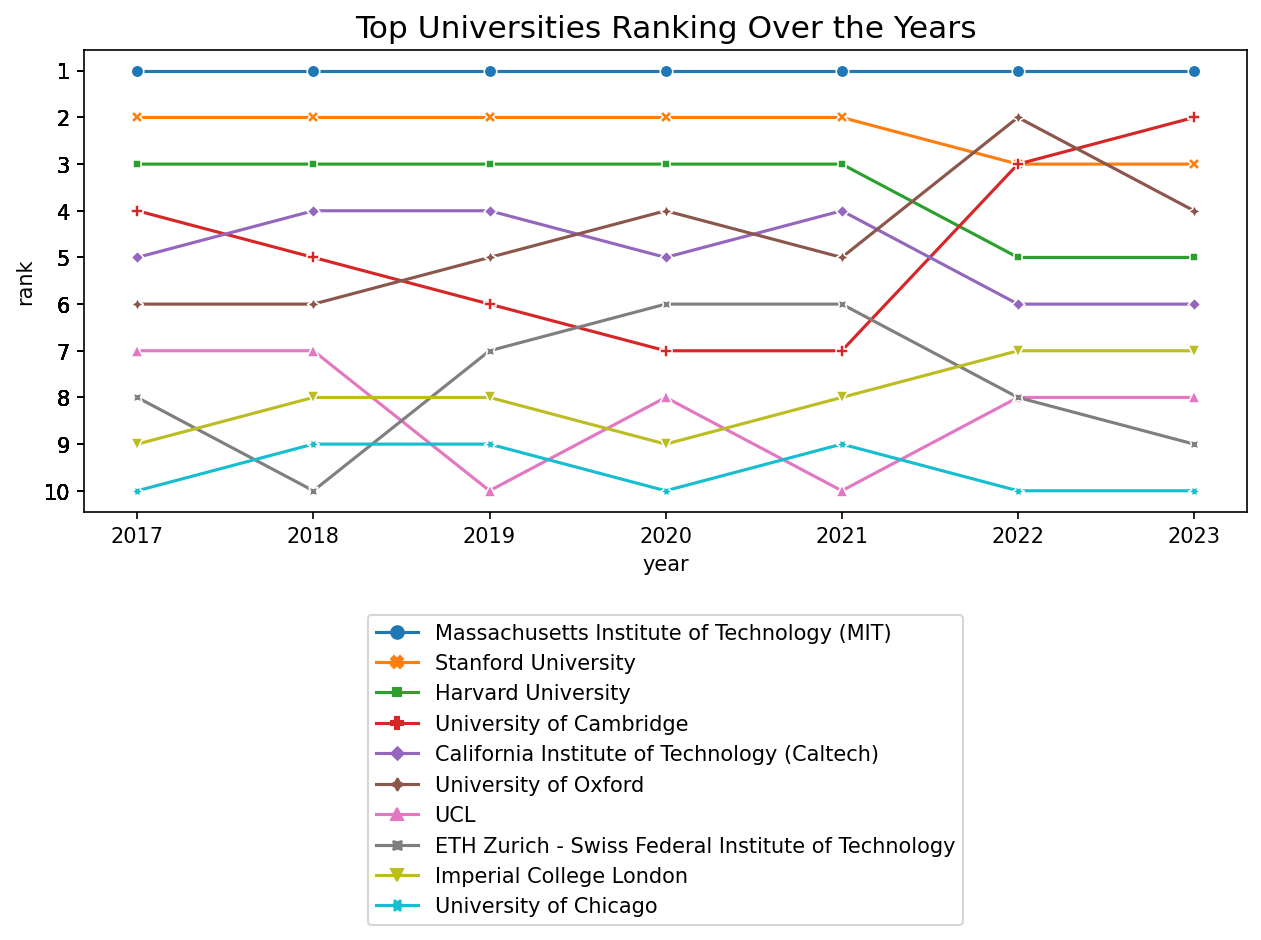

In [ ]:
# Top universities
topuni = df_join[df_join['rank'] <= 10]

# Line chart showing each year top universities
fig, ax = plt.subplots(figsize=(10,4), dpi=150)
sns.lineplot(data=topuni, x="year", y="rank", hue="university", style="university",markers=True, dashes=False)
# Put a legend under the chart
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2))
# set 1 as top y axis
plt.gca().invert_yaxis()
# show all y axis
plt.yticks(topuni['rank'])

plt.title("Top Universities Ranking Over the Years", fontsize=15);